<a href="https://colab.research.google.com/github/HarikrishnareddGali/HarikrishnareddGali/blob/main/Bonus_test(Longformer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

**Name:** *Hari Krishna Reddy, Gali*

**Place:** *Halle(Saale)*

**Project Name:** *Text Classification of gnad10 dataset*

**Environment:** *Google Colab*

**Summary of the project:** *Text classification of Ten thousand German News Articles Dataset(gnad10) using bert-based-german-cased checkpoint.*


**Purpose of the project:** *Sogedes.AI technical test*

**Libraries Used:** *huggingface transformers library, sklearn, numpy, matplotlib, huggingface datasets*

**Frameworks:** *Pytorch*

**Source:**[huggingface tutorials](https://huggingface.co/docs/transformers/tasks/sequence_classification), [Datasets](https://huggingface.co/datasets/gnad10), [bert-base-german-cased](https://huggingface.co/bert-base-german-cased), [huggingface Evaluate](https://huggingface.co/docs/evaluate/index), [transformers](https://jalammar.github.io/illustrated-transformer/), [bert](https://jalammar.github.io/a-visual-guide-to-using-bert-for-the-first-time/), [sklearn metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

# **Setup environmet**

**Installing Required Libraries**

In [ ]:
!pip install transformers datasets evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 102.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 20.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


**Created a huggingface account to use the gnad10 dataset and huggingface trainer**

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


**Checking the version of the transformers**

In [ ]:
import transformers

print(transformers.__version__)

4.26.0


# **Data**



**Loading gnad10 dataset**

**gnad10 dataset consists of 9 different classes**

**names=[
                            "Web",
                            "Panorama",
                            "International",
                            "Wirtschaft",
                            "Sport",
                            "Inland",
                            "Etat",
                            "Wissenschaft",
                            "Kultur",
                        ]**
[More information of the dataset can be found here.](https://huggingface.co/datasets/gnad10)

In [ ]:
from datasets import load_dataset, load_metric

gnad10 = load_dataset("gnad10")

Generating train split:   0%|          | 0/9245 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1028 [00:00<?, ? examples/s]

Dataset gnad10 downloaded and prepared to /root/.cache/huggingface/datasets/gnad10/default/1.1.0/3a8445be65795ad88270af4d797034c3d99f70f8352ca658c586faf1cf960881. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

# **Split**



**We can see the loaded data is already split into train and test**

**Dataset consists of a text and label**

In [ ]:
gnad10

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9245
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1028
    })
})


**Split the train dataset to generate validation data set**

In [ ]:
gnad10_train_validation = gnad10['train'].train_test_split(train_size=0.8)
gnad10_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

In [ ]:
gnad10_train_validation['test']

Dataset({
    features: ['text', 'label'],
    num_rows: 1849
})

In [ ]:
gnad10_train_validation['validation'] = gnad10_train_validation.pop('test')
gnad10_train_validation

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

**Successfully splited data into train,test and validation**

In [ ]:
gnad10.update(gnad10_train_validation)
gnad10

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1028
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1849
    })
})

**Overview of gnad10**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 250)

gnad10.set_format('pandas')
df = gnad10['train'][:]
df.sample(frac=1 ,random_state=1).head(10)

,text,label
573,"Weg frei für Umsetzung. Teheran – Der iranische Wächterrat hat als höchstes Verfassungsorgan das Landes das Atomabkommen mit dem Westen ratifiziert. Die Entscheidung sei am Mittwoch getroffen worden, berichtete die iranische Nachrichtenagentur IS...",2
4146,Zagreber Gericht hob Untersuchungshaft auf – Verfassungsgericht hatte Verlängerung der U-Haft für gesetzeswidrig erklärt. Zagreb – Der kroatische Ex-Premier Ivo Sanader kommt frei. Das Zagreber Landesgericht hob am Mittwoch die Untersuchungshaft ...,2
5232,"Online-Shooter spielte 330 Millionen Dollar in den ersten fünf Tagen ein. Der Online-Shooter The Division ist die erfolgreichste neue Videospielmarke seit dem Genrekonkurrenten Destiny, dies behauptet zumindest Hersteller Ubisoft. In den ersten f...",0
783,"Eine Sicherheitswacht soll die Polizei unterstützen, wenn es nach dem FPÖ-Chef geht. Wien – FPÖ-Chef Heinz-Christian Strache will die Zahl der Wiener Bezirke oder zumindest jene der Bezirksvorsteher reduzieren. Vor der Wahl am 11. Oktober würde e...",5
7140,30 Jahre lang blieb die in Südostasien entdeckte Vertreterin der Hufeisennasen unerkannt. London – Seit über 30 Jahren lagerte eine in Konservierungsflüssigkeit eingelegte Fledermaus im Londoner Natural History Museum – nun hat sie sich als Vertr...,7
5080,Können umweltbedingte Veränderungen auch ohne DNA vererbt werden? Die israelische Evolutionsbiologin Eva Jablonka ist die wichtigste Befürworterin dieser Theorie. STANDARD: Seit gut zwanzig Jahren findet in der Biologie so etwas wie eine epigenet...,7
3529,"Betreiber von ""FiveM"" für Social Club gesperrt – bisher keine Stellungnahme der ""GTA""-Entwickler. Wieder einmal sorgt Rockstar für Aufsehen, weil sie Spieler aus dem Grand Theft Auto 5-Universum gebannt haben. Laut einem Reddit-Beitrag wurden zwe...",0
2695,Für Salzburger steht vor der Finalserie gegen Znojmo Kräftesammeln am Programm. Wien – Topfavorit Red Bull Salzburg hat es mit durchwegs knappen Siegen gegen den Außenseiter VSV wieder ins EBEL-Endspiel geschafft. Als Gegner wartet auf den Titelv...,4
1729,Nahe Bordeaux stieß mit Seniorengruppe besetzer Bus mit Lkw zusammen und fing Feuer – Mehrere Verletzte. Bordeaux – Der Unfall ereignete sich Freitagfrüh um 7.30 Uhr auf einer Landstraße nahe des berühmten Weingebietes Saint-Emilion östlich von ...,1
1961,"Angriff auf vernetzte Kopierer und Drucker offenbar aus den USA – Sicherheitsleck behoben. Europa wird von feindseligen Fremden überschwemmt. Juden waren es und sind es, die den Neger an den Rhein bringen. Das sind Auszüge dessen, was kürzlich an...",0


In [ ]:
gnad10.reset_format()

# **Preprocess**

**Using Longformer for large tokens as the bert base max leng of tokens is 512**

**The Maximum length of Longformer is 4096**

**Checking the configuration of the Longformer**

In [ ]:
from transformers import LongformerTokenizerFast, LongformerForSequenceClassification, Trainer, TrainingArguments, LongformerConfig, AutoTokenizer

config = LongformerConfig()

config

LongformerConfig {
  "attention_probs_dropout_prob": 0.1,
  "attention_window": 512,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "onnx_export": false,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "sep_token_id": 2,
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "vocab_size": 30522
}

**Tokenizing the texts using AutoTokenizer and max_length = 1024**

**Using 4096 token length causing memory allocation error in the colab even for batch size of 1**

In [ ]:
checkpoint = "allenai/longformer-base-4096"
tokenizer = AutoTokenizer.from_pretrained(checkpoint, max_length = 1024)

def tokenize_function(batch):
    return tokenizer(batch["text"], padding='max_length', truncation=True, max_length= 1024)

gnad10_encoded = gnad10.map(tokenize_function, batched=True, batch_size=None)
gnad10_encoded

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 7396
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1028
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 1849
    })
})

**Ensuring the padding and truncation applied to the dataset**

In [ ]:
len(gnad10_encoded['train']['input_ids'][0])

1024

# **Evaluate**



**For the evaluation one can use huggingface [Evaluate Library](https://huggingface.co/docs/evaluate/index)**

**I used sklearn.metrics to create function for computing metrics**

In [ ]:
from sklearn.metrics import accuracy_score
def get_accuracy(preds):
  predictions = preds.predictions.argmax(axis=-1)
  labels = preds.label_ids
  accuracy = accuracy_score(preds.label_ids, preds.predictions.argmax(axis=-1))
  return {'accuracy': accuracy}

# **Train the Model**



**Finally ready to train the model!**

**Load Longformer with [LongformerForSequenceClassification](https://huggingface.co/docs/transformers/model_doc/longformer#transformers.LongformerForSequenceClassification) along with the number of expected labels**

**Tuning gradient checkpoint for the fast execution of the model. The source is from [Explore Gradient-Checkpointing in PyTorch
](https://qywu.github.io/2019/05/22/explore-gradient-checkpointing.html)**

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_labels = 9
model = (LongformerForSequenceClassification
         .from_pretrained(checkpoint, num_labels=num_labels, gradient_checkpointing=False)
         .to(device))

**Checking the configuration of the model**

In [ ]:
model.config

LongformerConfig {
  "_name_or_path": "allenai/longformer-base-4096",
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": [
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512,
    512
  ],
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8"
  },
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5,
    "LABEL_6": 6,
    "LABEL_7": 7,
    "LABEL_8": 8
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  

# **Training Params**



**Using the huggingface [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer) and adding compute metrics function in the trainer.**

**In trainer we evaluate the validation dataset.**

**I also decreased the batch size for training and tuned FP16. The souce I learnt from [Mixed Precision in Deep Learning](https://jonathan-hui.medium.com/mixed-precision-in-deep-learning-67f6dce3e0f3)**

In [ ]:
from transformers import Trainer, TrainingArguments
batch_size = 8
logging_steps = len(gnad10_encoded["train"]) // batch_size
model_name = f"{checkpoint}-finetuned-gnad10"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  gradient_accumulation_steps=batch_size,
                                  per_device_eval_batch_size=16,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  fp16 = True,
                                  logging_steps=logging_steps,
                                  log_level="error",
                                  dataloader_num_workers = 0,
                                  optim='adamw_torch'
                                  )
torch.cuda.empty_cache()
trainer = Trainer(model=model, 
                  args=training_args, 
                  compute_metrics=get_accuracy,
                  train_dataset=gnad10_encoded["train"],
                  eval_dataset=gnad10_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();
     

Epoch,Training Loss,Validation Loss,Accuracy
0,No log,0.514505,0.832883
1,No log,0.505469,0.839373
2,No log,0.469392,0.853975
3,No log,0.450715,0.861006
4,No log,0.451817,0.862628


**Training Results**

In [ ]:
trainer.evaluate()

{'eval_loss': 0.4518170654773712,
 'eval_accuracy': 0.8626284478096268,
 'eval_runtime': 117.9763,
 'eval_samples_per_second': 15.673,
 'eval_steps_per_second': 0.983,
 'epoch': 4.99}

# **Evaluate Test dataset**

**Analysing the test dataset using obtained predictions**

**Deriving classification report to analyze accuracy and f1 score of each label**

**Use sklearn metrics to get accuracy,f1 and loss of testdata**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
prds = trainer.predict(gnad10_encoded['test'])
y_preds = prds.predictions.argmax(axis=-1)
y_true = prds.label_ids
target_names = ['web','Panorama','International','Wirtschaft','Sport','Inland','Etat','Wissenschaft','Kultur']
print(classification_report(y_true, y_preds, target_names=target_names))

acc=print("accuracy:",accuracy_score(y_true, y_preds))
f1=print("f1_score:",f1_score(y_true, y_preds, average='weighted'))

               precision    recall  f1-score   support

          web       0.95      0.96      0.96       168
     Panorama       0.78      0.80      0.79       168
International       0.85      0.83      0.84       151
   Wirtschaft       0.85      0.83      0.84       141
        Sport       0.98      0.97      0.98       120
       Inland       0.79      0.80      0.80       102
         Etat       0.85      0.75      0.79        67
 Wissenschaft       0.81      0.88      0.84        57
       Kultur       0.82      0.83      0.83        54

     accuracy                           0.86      1028
    macro avg       0.85      0.85      0.85      1028
 weighted avg       0.86      0.86      0.86      1028

accuracy: 0.8589494163424124
f1_score: 0.8588653679582283


**Generate confusion matrix to analyze and improve the test dataset**

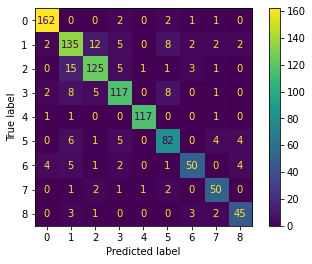

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
trainer.save_model()

# **Conclusion**

**With increased token lengths the accuracy is reduced and training time increased when compared to bert model where the token length is only 512.**

**Longformer with 5 epochs batch size of 8 has achieved 85.8% accuracy in 2hrs,40 minutes.**

**bert base model with 2 epochs batch size of 16 has achieved 90% accuracy in 30 minutes.**

**May be one should not meant to read whole book to know the genre of the book, bunch of papers at the starting of the book should do the job!!!**